<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/end%20to%20end%20modelling_deep%20learning/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import datetime


In [2]:

# Load dataset
url = "/content/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=column_names, na_values=" ?")
data.dropna(inplace=True)

data['income'] = LabelEncoder().fit_transform(data['income'])
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Split data
X = data.drop("income", axis=1)
y = data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# TensorBoard setup
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print(classification_report(y_test, y_pred))

Epoch 1/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7767 - loss: 0.4668 - val_accuracy: 0.8420 - val_loss: 0.3438
Epoch 2/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8351 - loss: 0.3550 - val_accuracy: 0.8475 - val_loss: 0.3302
Epoch 3/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8392 - loss: 0.3424 - val_accuracy: 0.8472 - val_loss: 0.3306
Epoch 4/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8452 - loss: 0.3289 - val_accuracy: 0.8521 - val_loss: 0.3201
Epoch 5/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8533 - loss: 0.3183 - val_accuracy: 0.8531 - val_loss: 0.3197
Epoch 6/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8510 - loss: 0.3231 - val_accuracy: 0.8543 - val_loss: 0.3181
Epoch 7/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8546 - loss: 0.3220 - val_accuracy: 0.8541 - val_loss: 0.3161
Epoch 8/20
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8511 - loss: 0.3184 - val_accuracy: 0.

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


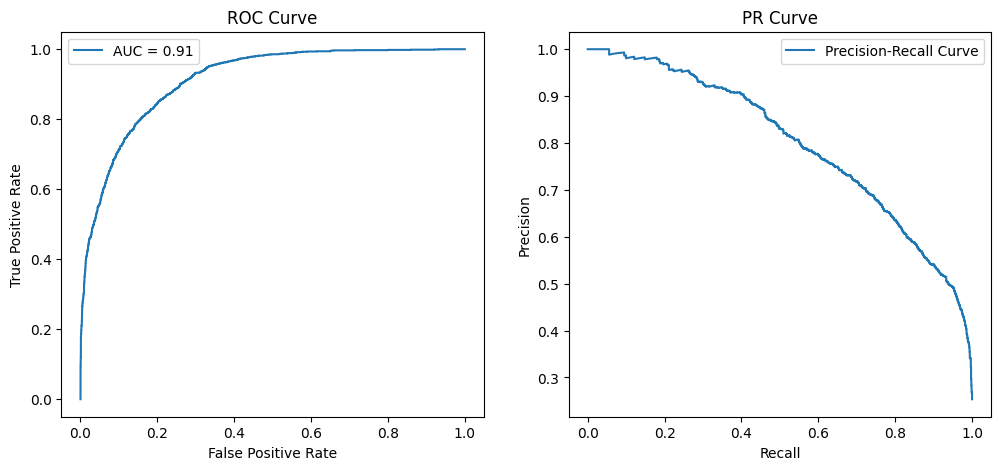

In [5]:
# ROC and PR curves
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend()

plt.show()

In [6]:
# Per-class analysis
class_counts = y_test.value_counts()
print("Per-Class Counts:\n", class_counts)

misclassified_indices = np.where(y_pred.flatten() != y_test.to_numpy())[0]
print("Example of misclassified cases:")
print(X_test[misclassified_indices[:5]])

Per-Class Counts:
 income
0    4503
1    1530
Name: count, dtype: int64
Example of misclassified cases:
[[-7.88254513e-01 -1.07088298e+00  1.91320112e+00 -1.47741199e-01
  -2.18133078e-01  1.16878199e+00 -2.71544113e-01  5.94119061e-01
  -1.91434559e-01 -3.01204525e-01 -2.10629087e-01 -2.32176916e-02
  -1.90151289e-01 -1.11634384e-01 -7.04007686e-02 -9.52624871e-02
  -1.37855652e-01 -1.24792011e-01 -1.89682796e-01 -2.15412874e-01
  -4.48047380e-01 -1.12770562e-01 -6.92779599e-01 -2.37562786e-01
  -3.86550118e-02  7.36309059e+00 -5.33817501e-01 -2.65526483e-02
  -9.34075631e-01 -1.11253207e-01  1.43815363e+00 -1.75754134e-01
  -1.67042546e-01 -1.93166852e-02 -3.93202361e-01 -3.87916470e-01
  -1.85898256e-01 -2.16988109e-01 -2.66405776e-01 -3.42627670e-01
  -6.70527102e-02  2.53913809e+00 -1.47971775e-01 -3.69239690e-01
  -1.77500698e-01 -2.33939000e-01  1.70812220e+00 -1.74371044e-01
  -4.20401452e-01 -3.43910000e-01 -2.21864400e-01 -1.73865699e-01
  -3.19976356e-01 -8.93249439e-02  4.0